# Fruits-262
 The data for this project was taken from [Kaggle](https://www.kaggle.com/aelchimminut/fruits262) 

The following fruit types/labels/clades are included:
abiu, acai, acerola, ackee, alligator apple, ambarella, apple, apricot, araza, avocado, bael, banana, barbadine, barberry, bayberry, beach plum, bearberry, bell pepper, betel nut, bignay, bilimbi, bitter gourd, black berry, black cherry, black currant, black mullberry, black sapote, blueberry, bolwarra, bottle gourd, brazil nut, bread fruit, buddha s hand, buffaloberry, burdekin plum, burmese grape, caimito, camu camu, canistel, cantaloupe, cape gooseberry, carambola, cardon, cashew, cedar bay cherry, cempedak, ceylon gooseberry, che, chenet, cherimoya, cherry, chico, chokeberry, clementine, cloudberry, cluster fig, cocoa bean, coconut, coffee, common buckthorn, corn kernel, cornelian cherry, crab apple, cranberry, crowberry, cupuacu, custard apple, damson, date, desert fig, desert lime, dewberry, dragonfruit, durian, eggplant, elderberry, elephant apple, emblic, entawak, etrog, feijoa, fibrous satinash, fig, finger lime, galia melon, gandaria, genipap, goji, gooseberry, goumi, grape, grapefruit, greengage, grenadilla, guanabana, guarana, guava, guavaberry, hackberry, hard kiwi, hawthorn, hog plum, honeyberry, honeysuckle, horned melon, illawarra plum, indian almond, indian strawberry, ita palm, jaboticaba, jackfruit, jalapeno, jamaica cherry, jambul, japanese raisin, jasmine, jatoba, jocote, jostaberry, jujube, juniper berry, kaffir lime, kahikatea, kakadu plum, keppel, kiwi, kumquat, kundong, kutjera, lablab, langsat, lapsi, lemon, lemon aspen, leucaena, lillipilli, lime, lingonberry, loganberry, longan, loquat, lucuma, lulo, lychee, mabolo, macadamia, malay apple, mamey apple, mandarine, mango, mangosteen, manila tamarind, marang, mayhaw, maypop, medlar, melinjo, melon pear, midyim, miracle fruit, mock strawberry, monkfruit, monstera deliciosa, morinda, mountain papaya, mountain soursop, mundu, muskmelon, myrtle, nance, nannyberry, naranjilla, native cherry, native gooseberry, nectarine, neem, nungu, nutmeg, oil palm, old world sycomore, olive, orange, oregon grape, otaheite apple, papaya, passion fruit, pawpaw, pea, peanut, pear, pequi, persimmon, pigeon plum, pigface, pili nut, pineapple, pineberry, pitomba, plumcot, podocarpus, pomegranate, pomelo, prikly pear, pulasan, pumpkin, pupunha, purple apple berry, quandong, quince, rambutan, rangpur, raspberry, red mulberry, redcurrant, riberry, ridged gourd, rimu, rose hip, rose myrtle, rose-leaf bramble, saguaro, salak, salal, salmonberry, sandpaper fig, santol, sapodilla, saskatoon, sea buckthorn, sea grape, snowberry, soncoya, strawberry, strawberry guava, sugar apple, surinam cherry, sycamore fig, tamarillo, tangelo, tanjong, taxus baccata, tayberry, texas persimmon, thimbleberry, tomato, toyon, ugli fruit, vanilla, velvet tamarind, watermelon, wax gourd, white aspen, white currant, white mulberry, white sapote, wineberry, wongi, yali pear, yellow plum, yuzu, zigzag vine, zucchini



## Dataset Properties

Total number of images: 225,640.

Number of classes: 262 fruits.

Number of images per label: Average: 861, Median: 1007, StDev: 276. (Initial target was 1,000 per label)

Image Width: Average: 213, Median: 209, StDev: 19.

Image Height: Average: 262, Median: 255, StDev: 30.

Missing Images from the initial 1,000 target: Average: 580, Median: 567, StDev: 258.

Format: a directory name represents a label and in each directory all the image data under the said label (the images are numbered but there might be missing numbers. The "renumber.py" script, if run, will fix the number gap problem).

Different varieties of the same fruit are generally stored in the same directory (Example: green, yellow and red apple).

The fruit images present in the dataset can contain the fruit in all the stages of its life and also can contain slices of the fruit.

Images contain at least 50% fruit information (according to the manual filtering selection paradigm).

The background of the images can be anything (due to the nature of the data): monochromatic backgrounds, human hands, natural habitats of the fruit, leaves etc.

There are no duplicate images but there are some images (of the same label) with a high degree of similarity.

Images can contain small watermarks.

Some fruits which had between 50-100 usable images still remain in the dataset, but can be discarded for a better balance and lesser variety. This is also one big reason for the high variance in the missing images statistic provided above.

In [ ]:
!wget https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py

--2021-07-03 08:16:35--  https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10139 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.90K  --.-KB/s    in 0s      

2021-07-03 08:16:35 (69.6 MB/s) - ‘helper_functions.py’ saved [10139/10139]



## Importing dependancies 

Packages and modules required for successful running of this notebook

In [ ]:
# Importing depeandancies
import os 
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, make_confusion_matrix

## Getting our data ready

In [ ]:
# Unzipping our data
unzip_data("/content/fruits262.zip")

In [ ]:
# Check for dir in provided data
walk_through_dir("/content/Fruit-262")

There are 262 directories and 0 images in '/content/Fruit-262'.
There are 0 directories and 1038 images in '/content/Fruit-262/otaheite apple'.
There are 0 directories and 1021 images in '/content/Fruit-262/cupuacu'.
There are 0 directories and 1022 images in '/content/Fruit-262/indian strawberry'.
There are 0 directories and 756 images in '/content/Fruit-262/tamarillo'.
There are 0 directories and 1018 images in '/content/Fruit-262/oil palm'.
There are 0 directories and 1012 images in '/content/Fruit-262/grapefruit'.
There are 0 directories and 999 images in '/content/Fruit-262/bottle gourd'.
There are 0 directories and 925 images in '/content/Fruit-262/miracle fruit'.
There are 0 directories and 1000 images in '/content/Fruit-262/bell pepper'.
There are 0 directories and 1021 images in '/content/Fruit-262/chico'.
There are 0 directories and 1046 images in '/content/Fruit-262/kumquat'.
There are 0 directories and 1007 images in '/content/Fruit-262/carambola'.
There are 0 directories a

The data set with us is quite uneven and so it would be best if we balance our data limiting to only 200 images per class and dropping the other remaining.

### Balancing the data

In [ ]:
# balancing the data allowing only similar number of images
dir="/content/Fruit-262"

filepaths=[]
labels=[]
classlist=os.listdir(dir)
for label in classlist:
    classpath=os.path.join(dir,label)
    if os.path.isdir(classpath):
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(label)                   
Fseries= pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')    
df=pd.concat([Fseries, Lseries], axis=1)
print(df.head())
print(df['labels'].value_counts())

                                   filepaths          labels
0  /content/Fruit-262/otaheite apple/674.jpg  otaheite apple
1  /content/Fruit-262/otaheite apple/102.jpg  otaheite apple
2  /content/Fruit-262/otaheite apple/878.jpg  otaheite apple
3  /content/Fruit-262/otaheite apple/508.jpg  otaheite apple
4  /content/Fruit-262/otaheite apple/232.jpg  otaheite apple
pea                1405
jujube             1277
abiu               1275
mock strawberry    1268
acerola            1243
                   ... 
zigzag vine         141
tanjong             111
rimu                 98
pigface              96
podocarpus           51
Name: labels, Length: 262, dtype: int64


In [ ]:
balance=df['labels'].value_counts()
blist=list(balance)
print(blist)

[1405, 1277, 1275, 1268, 1243, 1203, 1169, 1169, 1162, 1129, 1126, 1117, 1107, 1105, 1105, 1097, 1089, 1077, 1074, 1062, 1053, 1052, 1051, 1051, 1050, 1046, 1045, 1043, 1038, 1038, 1037, 1036, 1035, 1035, 1035, 1033, 1032, 1032, 1032, 1031, 1031, 1031, 1031, 1030, 1028, 1028, 1027, 1027, 1027, 1026, 1026, 1026, 1025, 1025, 1024, 1024, 1024, 1024, 1023, 1023, 1023, 1022, 1022, 1021, 1021, 1021, 1021, 1021, 1020, 1020, 1020, 1019, 1018, 1018, 1018, 1018, 1018, 1017, 1017, 1016, 1016, 1015, 1015, 1015, 1014, 1014, 1014, 1014, 1013, 1013, 1013, 1013, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1011, 1011, 1011, 1011, 1011, 1010, 1010, 1010, 1010, 1010, 1010, 1010, 1010, 1010, 1010, 1009, 1009, 1009, 1009, 1008, 1008, 1008, 1008, 1008, 1008, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1006, 1006, 1006, 1005, 1005, 1005, 1005, 1004, 1004, 1003, 1003, 1003, 1003, 1003, 1002, 1002, 1002, 1002, 1002, 1002, 1001, 1001, 1000, 1000, 1000, 1000, 1000, 999, 998, 996, 991, 948, 94

## Converting the data into dataframe

In [ ]:
# The data set given would be best to handle when converted into dataframe
print ('original number of classes: ', len(df['labels'].unique()))     
size=200 # set number of samples for each class
samples=[]
group=df.groupby(labels)
for label in df['labels'].unique():
    Lgroup=group.get_group(label)
    count=int(Lgroup['labels'].value_counts())    
    if count>=size:
        sample=Lgroup.sample(size, axis=0)
        samples.append(sample) 
df=pd.concat(samples, axis=0).reset_index(drop=True)
print (len(df))
print ('final number of classes: ', len(df['labels'].unique()))       
print (df['labels'].value_counts())

original number of classes:  262
51000
final number of classes:  255
morinda            200
japanese raisin    200
soncoya            200
grapefruit         200
dragonfruit        200
                  ... 
salmonberry        200
velvet tamarind    200
lucuma             200
langsat            200
monkfruit          200
Name: labels, Length: 255, dtype: int64


### Splitting the dataset 

In [ ]:
# Getting dataframes ready for train, test and validation
train_split=.9
test_split=.05
dummy_split=test_split/(1-train_split)

train_df, dummy_df=train_test_split(df, 
                                    train_size=train_split, 
                                    shuffle=True, 
                                    random_state=123)

test_df, valid_df=train_test_split(dummy_df, 
                                   train_size=dummy_split, 
                                   shuffle=True, 
                                   random_state=123)

print ('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

train_df length:  45900   test_df length:  2550   valid_df length:  2550


In [ ]:
# Image generators
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [ ]:
valid_df.head()

,filepaths,labels
39832,/content/Fruit-262/jostaberry/178.jpg,jostaberry
19604,/content/Fruit-262/avocado/126.jpg,avocado
3378,/content/Fruit-262/lablab/787.jpg,lablab
39961,/content/Fruit-262/jostaberry/342.jpg,jostaberry
15008,/content/Fruit-262/dragonfruit/423.jpg,dragonfruit


In [ ]:
# Converting data ready into batches so that it is easier to train our model
train_data = train_datagen.flow_from_dataframe(train_df,
                                               x_col='filepaths',
                                               y_col='labels',
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               seed=42,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_dataframe(test_df,
                                             x_col='filepaths',
                                             y_col='labels',
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                             shuffle=False)

val_data = test_datagen.flow_from_dataframe(valid_df,
                                            x_col='filepaths',
                                            y_col='labels',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 45900 validated image filenames belonging to 255 classes.
Found 2550 validated image filenames belonging to 255 classes.
Found 2550 validated image filenames belonging to 255 classes.


### Viewing random image from the dataset

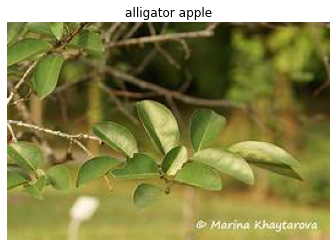

In [ ]:
# Viewing random image
files = pd.unique(train_df["filepaths"])
pic = random.choice(files)
img = plt.imread(pic)
pic = pic[19:]
plt.title(pic.split("/")[0])
plt.imshow(img)
plt.axis(False);

In [ ]:
# Setting up augmentation layer
data_augmentation = tf.keras.models.Sequential([
  preprocessing.RandomFlip("horizontal"), 
  preprocessing.RandomRotation(0.2), 
  preprocessing.RandomHeight(0.2), 
  preprocessing.RandomWidth(0.2), 
  preprocessing.RandomZoom(0.2),
], name="data_augmentation_layer")

## Model 1

In [ ]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer") 
x = data_augmentation(inputs) 
x = base_model(x, training=False) 
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(255, activation="softmax", name="output_layer")(x) 
model_1 = tf.keras.Model(inputs, outputs)


16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
# Compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=val_data,
                        validation_steps=len(val_data)) 

Epoch 1/5
1435/1435 [==============================] - 313s 194ms/step - loss: 2.8141 - accuracy: 0.3973 - val_loss: 1.9294 - val_accuracy: 0.5467
Epoch 2/5
1435/1435 [==============================] - 185s 129ms/step - loss: 1.8217 - accuracy: 0.5660 - val_loss: 1.6885 - val_accuracy: 0.5871
Epoch 3/5
1435/1435 [==============================] - 161s 112ms/step - loss: 1.5568 - accuracy: 0.6201 - val_loss: 1.6207 - val_accuracy: 0.6000
Epoch 4/5
1435/1435 [==============================] - 147s 102ms/step - loss: 1.4010 - accuracy: 0.6528 - val_loss: 1.5672 - val_accuracy: 0.6071
Epoch 5/5
1435/1435 [==============================] - 138s 96ms/step - loss: 1.2796 - accuracy: 0.6793 - val_loss: 1.5284 - val_accuracy: 0.6231


In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

history_2 = model_1.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data), 
                        validation_data=val_data,
                        validation_steps=len(val_data),
                        callbacks=early_stopping) 

Epoch 1/20
1435/1435 [==============================] - 127s 88ms/step - loss: 0.6715 - accuracy: 0.8204 - val_loss: 1.3935 - val_accuracy: 0.6639
Epoch 2/20
1435/1435 [==============================] - 126s 88ms/step - loss: 0.6464 - accuracy: 0.8245 - val_loss: 1.3788 - val_accuracy: 0.6616
Epoch 3/20
1435/1435 [==============================] - 127s 88ms/step - loss: 0.6168 - accuracy: 0.8330 - val_loss: 1.4015 - val_accuracy: 0.6659
Epoch 4/20
1435/1435 [==============================] - 126s 88ms/step - loss: 0.5861 - accuracy: 0.8388 - val_loss: 1.3863 - val_accuracy: 0.6729
Epoch 5/20
1435/1435 [==============================] - 126s 88ms/step - loss: 0.5645 - accuracy: 0.8462 - val_loss: 1.3837 - val_accuracy: 0.6682
Epoch 6/20
1435/1435 [==============================] - 127s 88ms/step - loss: 0.5389 - accuracy: 0.8516 - val_loss: 1.3967 - val_accuracy: 0.6627
Epoch 7/20
1435/1435 [==============================] - 126s 88ms/step - loss: 0.5147 - accuracy: 0.8585 - val_loss: 1

In [ ]:
model_1_results = model_1.evaluate(test_data)
model_1_results

80/80 [==============================] - 8s 98ms/step - loss: 1.5329 - accuracy: 0.6118


[1.5328636169433594, 0.6117647290229797]

In [ ]:
 model_1.evaluate(test_data)

80/80 [==============================] - 6s 80ms/step - loss: 1.4017 - accuracy: 0.6651


[1.4016666412353516, 0.6650980114936829]

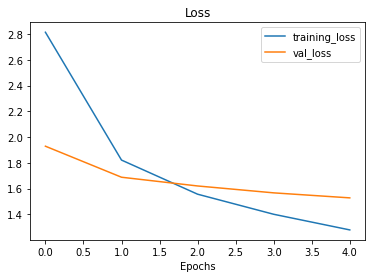

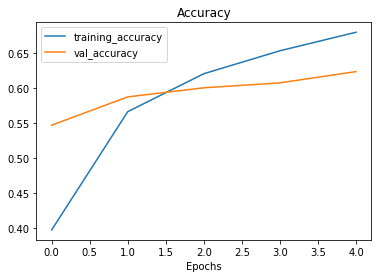

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 

history_1_fine_tune_1 = model_1.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    validation_data=val_data,
                                    validation_steps=len(val_data), 
                                    initial_epoch=history_1.epoch[-1]) 

In [ ]:
model_1.evaluate(test_data)

In [ ]:
plot_loss_curves(history_1_fine_tune_1)

In [ ]:
compare_historys(history_1, history_1_fine_tune_1, initial_epochs=5)

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-5),
                metrics=['accuracy'])

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 15 

history_1_fine_tune_2 = model_1.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    validation_data=val_data,
                                    validation_steps=len(val_data), 
                                    initial_epoch=history_1_fine_tune_1.epoch[-1]) 

In [ ]:
model_1.evaluate(test_data)

In [ ]:
plot_loss_curves(history_1_fine_tune_2)

In [ ]:
compare_historys(history_1_fine_tune_1, history_1_fine_tune_2, initial_epochs=10)

## Model 2

In [ ]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB2(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer") 
x = data_augmentation(inputs) 
x = base_model(x, training=False) 
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(255, activation="softmax", name="output_layer")(x) 
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=val_data,
                        validation_steps=len(val_data)) 
                        

In [ ]:
model_2.evaluate(test_data)

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10

history_2_fine_tune_1 = model_2.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    validation_data=val_data,
                                    validation_steps=len(val_data),
                                    initial_epoch=history_2.epoch[-1])

In [ ]:
model_2.evaluate(test_data)

In [ ]:
plot_loss_curves(history_2_fine_tune_1)

In [ ]:
compare_historys(history_2, history_2_fine_tune_1, initial_epochs=5)

## Model 3

In [ ]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB3(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer") 
x = data_augmentation(inputs) 
x = base_model(x, training=False) 
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(255, activation="softmax", name="output_layer")(x) 
model_3 = tf.keras.Model(inputs, outputs)

43941888/43941136 [==============================] - 0s 0us/step


In [ ]:
# Compile
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

history_3 = model_3.fit(train_data,
                        epochs=25,
                        steps_per_epoch=len(train_data), 
                        validation_data=val_data,
                        validation_steps=len(val_data),
                        callbacks=early_stopping) 

Epoch 1/25
1435/1435 [==============================] - 555s 321ms/step - loss: 2.8019 - accuracy: 0.3890 - val_loss: 2.0242 - val_accuracy: 0.5086
Epoch 2/25
1435/1435 [==============================] - 308s 215ms/step - loss: 1.8403 - accuracy: 0.5550 - val_loss: 1.8085 - val_accuracy: 0.5506
Epoch 3/25
1435/1435 [==============================] - 253s 176ms/step - loss: 1.5729 - accuracy: 0.6112 - val_loss: 1.7116 - val_accuracy: 0.5725
Epoch 4/25
1435/1435 [==============================] - 230s 160ms/step - loss: 1.4156 - accuracy: 0.6432 - val_loss: 1.6782 - val_accuracy: 0.5851
Epoch 5/25
1435/1435 [==============================] - 215s 149ms/step - loss: 1.3017 - accuracy: 0.6708 - val_loss: 1.6601 - val_accuracy: 0.5894
Epoch 6/25
1435/1435 [==============================] - 205s 143ms/step - loss: 1.2163 - accuracy: 0.6889 - val_loss: 1.6428 - val_accuracy: 0.6004
Epoch 7/25
1435/1435 [==============================] - 200s 139ms/step - loss: 1.1337 - accuracy: 0.7080 - val_

In [ ]:
model_3.evaluate(test_data)

80/80 [==============================] - 9s 116ms/step - loss: 1.5996 - accuracy: 0.6075


[1.5996389389038086, 0.6074509620666504]

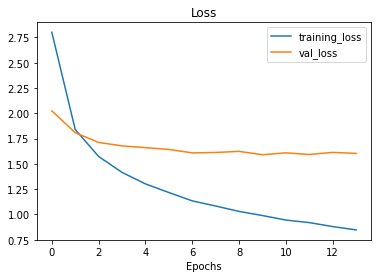

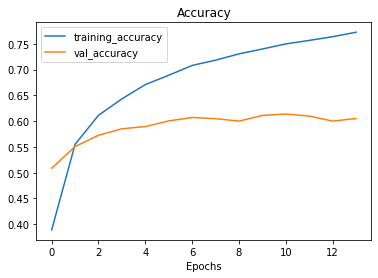

In [ ]:
plot_loss_curves(history_3)

## Model 4

In [ ]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer") 
x = data_augmentation(inputs) 
x = base_model(x, training=False) 
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(255, activation="softmax", name="output_layer")(x) 
model_4 = tf.keras.Model(inputs, outputs)

# Compile
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=val_data,
                        validation_steps=len(val_data)) 

16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/5
1435/1435 [==============================] - 321s 200ms/step - loss: 2.8269 - accuracy: 0.3931 - val_loss: 1.9797 - val_accuracy: 0.5278
Epoch 2/5
1435/1435 [==============================] - 185s 129ms/step - loss: 1.8304 - accuracy: 0.5640 - val_loss: 1.7472 - val_accuracy: 0.5733
Epoch 3/5
1435/1435 [==============================] - 156s 108ms/step - loss: 1.5587 - accuracy: 0.6214 - val_loss: 1.6709 - val_accuracy: 0.5941
Epoch 4/5
1435/1435 [==============================] - 146s 102ms/step - loss: 1.3974 - accuracy: 0.6545 - val_loss: 1.6232 - val_accuracy: 0.6086
Epoch 5/5
1435/1435 [==============================] - 135s 94ms/step - loss: 1.2881 - accuracy: 0.6796 - val_loss: 1.5965 - val_accuracy: 0.6020


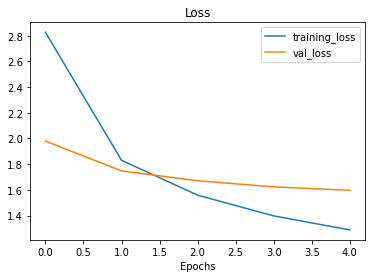

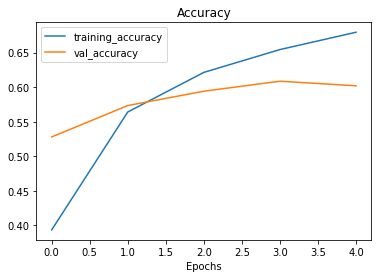

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-100]:
  layer.trainable = False

# Recompile model with lower learning rate
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

# Fine-tune for 5 more epochs
fine_tune_epochs = 50

history_4_fine_tune_1 = model_4.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    validation_data=val_data,
                                    validation_steps=len(val_data),
                                    initial_epoch=history_4.epoch[-1],
                                    callbacks=early_stopping)

Epoch 5/50
1435/1435 [==============================] - 192s 129ms/step - loss: 1.0004 - accuracy: 0.7380 - val_loss: 1.4534 - val_accuracy: 0.6502
Epoch 6/50
1435/1435 [==============================] - 175s 122ms/step - loss: 0.7869 - accuracy: 0.7875 - val_loss: 1.3825 - val_accuracy: 0.6655
Epoch 7/50
1435/1435 [==============================] - 172s 120ms/step - loss: 0.6489 - accuracy: 0.8212 - val_loss: 1.4613 - val_accuracy: 0.6710
Epoch 8/50
1435/1435 [==============================] - 169s 118ms/step - loss: 0.5478 - accuracy: 0.8466 - val_loss: 1.4318 - val_accuracy: 0.6769
Epoch 9/50
1435/1435 [==============================] - 170s 118ms/step - loss: 0.4648 - accuracy: 0.8671 - val_loss: 1.4554 - val_accuracy: 0.6729
Epoch 10/50
1435/1435 [==============================] - 169s 118ms/step - loss: 0.3912 - accuracy: 0.8846 - val_loss: 1.5007 - val_accuracy: 0.6824
Epoch 11/50
1435/1435 [==============================] - 167s 117ms/step - loss: 0.3375 - accuracy: 0.8985 - va

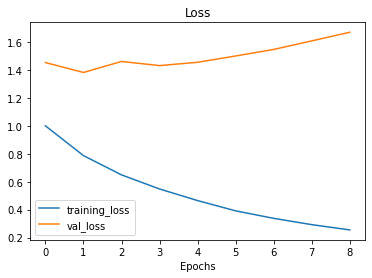

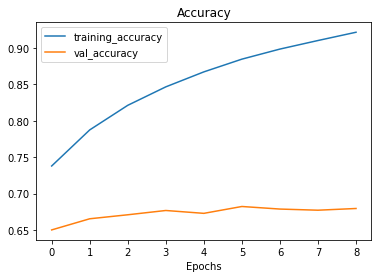

In [ ]:
plot_loss_curves(history_4_fine_tune_1)

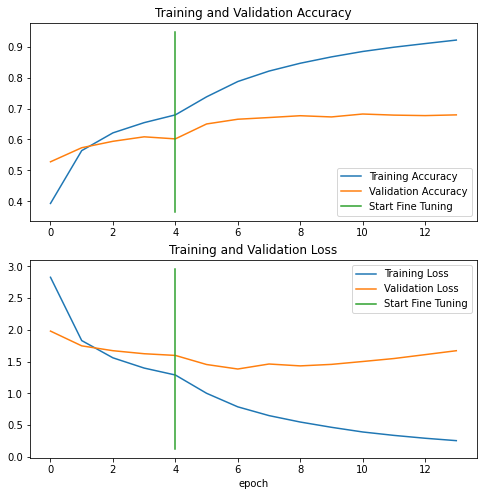

In [ ]:
compare_historys(history_4, history_4_fine_tune_1, initial_epochs=5)

## Model 5

In [ ]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB3(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer") 
x = data_augmentation(inputs) 
x = base_model(x, training=False) 
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(255, activation="softmax", name="output_layer")(x) 
model_B3 = tf.keras.Model(inputs, outputs)

# Compile
model_B3.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit
history_B3 = model_B3.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data), 
                          validation_data=val_data,
                          validation_steps=len(val_data)) 

43941888/43941136 [==============================] - 0s 0us/step
Epoch 1/5
1435/1435 [==============================] - 506s 327ms/step - loss: 2.8071 - accuracy: 0.3873 - val_loss: 2.0247 - val_accuracy: 0.5075
Epoch 2/5
1435/1435 [==============================] - 306s 214ms/step - loss: 1.8404 - accuracy: 0.5536 - val_loss: 1.8049 - val_accuracy: 0.5467
Epoch 3/5
1435/1435 [==============================] - 254s 177ms/step - loss: 1.5791 - accuracy: 0.6086 - val_loss: 1.6956 - val_accuracy: 0.5710
Epoch 4/5
1435/1435 [==============================] - 232s 162ms/step - loss: 1.4148 - accuracy: 0.6430 - val_loss: 1.6495 - val_accuracy: 0.5859
Epoch 5/5
1435/1435 [==============================] - 215s 150ms/step - loss: 1.2917 - accuracy: 0.6715 - val_loss: 1.6320 - val_accuracy: 0.5902


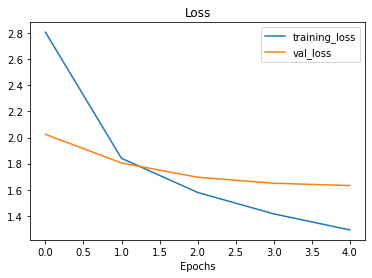

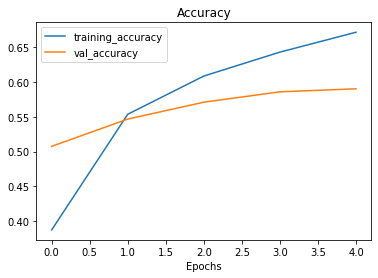

In [ ]:
plot_loss_curves(history_B3)

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 50
for layer in base_model.layers[:-50]:
  layer.trainable = False

# Recompile model with lower learning rate
model_B3.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(1e-4),
                 metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

# Fine-tune for 45 more epochs (5+45)
fine_tune_epochs = 50

history_B3_fine_tune_1 = model_B3.fit(train_data,
                                      epochs=fine_tune_epochs,
                                      validation_data=val_data,
                                      validation_steps=len(val_data),
                                      initial_epoch=history_B3.epoch[-1],
                                      callbacks=early_stopping)

Epoch 5/50
1435/1435 [==============================] - 224s 151ms/step - loss: 0.1849 - accuracy: 0.9434 - val_loss: 1.6478 - val_accuracy: 0.6812
Epoch 6/50
1435/1435 [==============================] - 219s 153ms/step - loss: 0.1643 - accuracy: 0.9488 - val_loss: 1.6688 - val_accuracy: 0.6745
Epoch 7/50
1435/1435 [==============================] - 220s 153ms/step - loss: 0.1513 - accuracy: 0.9527 - val_loss: 1.6500 - val_accuracy: 0.6910
Epoch 8/50
1435/1435 [==============================] - 216s 151ms/step - loss: 0.1399 - accuracy: 0.9571 - val_loss: 1.6851 - val_accuracy: 0.6769
Epoch 9/50
1435/1435 [==============================] - 217s 151ms/step - loss: 0.1293 - accuracy: 0.9590 - val_loss: 1.7226 - val_accuracy: 0.6843
Epoch 10/50
1435/1435 [==============================] - 217s 151ms/step - loss: 0.1281 - accuracy: 0.9598 - val_loss: 1.6509 - val_accuracy: 0.6969
Epoch 11/50
1435/1435 [==============================] - 218s 152ms/step - loss: 0.1217 - accuracy: 0.9622 - va

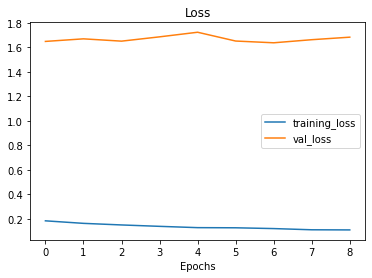

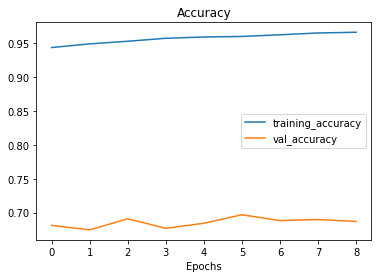

In [ ]:
plot_loss_curves(history_B3_fine_tune_1)

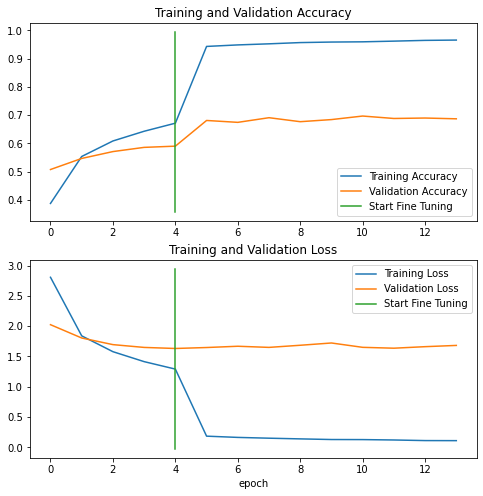

In [ ]:
compare_historys(history_B3, history_B3_fine_tune_1, initial_epochs=5)

## Saving and loading the best model

In [ ]:
tf.keras.models.save_model(model_B3, "/content/drive/MyDrive/Fruits-262_Model")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Fruits-262_Model/assets


In [ ]:
model_load = tf.keras.models.load_model("/content/drive/MyDrive/Fruits-262_Model")

### Evaluation of best model

In [ ]:
model_load.evaluate(test_data)

80/80 [==============================] - 11s 118ms/step - loss: 1.7351 - accuracy: 0.6965


[1.735092043876648, 0.6964705586433411]

## Insights of the best Model

In [ ]:
preds = model_load.predict(test_data)
preds

array([[3.2967772e-16, 1.3262458e-09, 1.2792330e-14, ..., 2.6424347e-16,
        2.0012646e-19, 1.1931388e-17],
       [1.4423055e-13, 5.1208959e-12, 8.5394198e-09, ..., 8.6216861e-14,
        1.2716658e-16, 1.5510660e-11],
       [2.4595640e-12, 3.8157321e-11, 4.0989000e-12, ..., 4.6068169e-10,
        1.3204209e-07, 5.8626395e-04],
       ...,
       [1.7037593e-05, 2.6440478e-06, 3.3086530e-07, ..., 2.1191319e-05,
        5.2426234e-02, 2.5961395e-09],
       [2.0389165e-10, 2.5027229e-12, 9.6114635e-12, ..., 6.3187695e-09,
        9.9374479e-01, 2.5175513e-15],
       [3.6685952e-14, 3.5023043e-12, 5.6985550e-16, ..., 1.1945985e-12,
        5.7556120e-11, 6.2296425e-11]], dtype=float32)

In [ ]:
preds[0].argmax()

218

In [ ]:
dict_class = test_data.class_indices

In [ ]:
classes = []

for elem in dict_class.keys():
  classes.append(elem)

In [ ]:
dict_class.keys()

dict_keys(['abiu', 'acai', 'acerola', 'ackee', 'alligator apple', 'ambarella', 'apple', 'apricot', 'araza', 'avocado', 'bael', 'banana', 'barbadine', 'barberry', 'bayberry', 'beach plum', 'bearberry', 'bell pepper', 'betel nut', 'bignay', 'bilimbi', 'bitter gourd', 'black berry', 'black cherry', 'black currant', 'black mullberry', 'black sapote', 'blueberry', 'bolwarra', 'bottle gourd', 'brazil nut', 'bread fruit', "buddha's hand", 'buffaloberry', 'burdekin plum', 'burmese grape', 'caimito', 'camu camu', 'canistel', 'cantaloupe', 'cape gooseberry', 'carambola', 'cardon', 'cashew', 'cedar bay cherry', 'cempedak', 'ceylon gooseberry', 'che', 'chenet', 'cherimoya', 'cherry', 'chico', 'chokeberry', 'clementine', 'cloudberry', 'cluster fig', 'cocoa bean', 'coconut', 'coffee', 'common buckthorn', 'corn kernel', 'cornelian cherry', 'crab apple', 'cranberry', 'crowberry', 'cupuacu', 'custard apple', 'damson', 'date', 'desert fig', 'desert lime', 'dewberry', 'dragonfruit', 'durian', 'eggplant',

In [ ]:
classes

['abiu',
 'acai',
 'acerola',
 'ackee',
 'alligator apple',
 'ambarella',
 'apple',
 'apricot',
 'araza',
 'avocado',
 'bael',
 'banana',
 'barbadine',
 'barberry',
 'bayberry',
 'beach plum',
 'bearberry',
 'bell pepper',
 'betel nut',
 'bignay',
 'bilimbi',
 'bitter gourd',
 'black berry',
 'black cherry',
 'black currant',
 'black mullberry',
 'black sapote',
 'blueberry',
 'bolwarra',
 'bottle gourd',
 'brazil nut',
 'bread fruit',
 "buddha's hand",
 'buffaloberry',
 'burdekin plum',
 'burmese grape',
 'caimito',
 'camu camu',
 'canistel',
 'cantaloupe',
 'cape gooseberry',
 'carambola',
 'cardon',
 'cashew',
 'cedar bay cherry',
 'cempedak',
 'ceylon gooseberry',
 'che',
 'chenet',
 'cherimoya',
 'cherry',
 'chico',
 'chokeberry',
 'clementine',
 'cloudberry',
 'cluster fig',
 'cocoa bean',
 'coconut',
 'coffee',
 'common buckthorn',
 'corn kernel',
 'cornelian cherry',
 'crab apple',
 'cranberry',
 'crowberry',
 'cupuacu',
 'custard apple',
 'damson',
 'date',
 'desert fig',
 'de

In [ ]:
classes[218]

'salal'

In [ ]:
len(classes)

255

In [ ]:
preds.shape

(2550, 255)

In [ ]:
preds = preds.argmax(axis=1)
preds

array([218, 210, 164, ...,  53, 253,  32])

In [ ]:
test_df.head()

,filepaths,labels
7253,/content/Fruit-262/salal/332.jpg,salal
34972,/content/Fruit-262/black mullberry/845.jpg,black mullberry
39483,/content/Fruit-262/mountain papaya/542.jpg,mountain papaya
43154,/content/Fruit-262/ugli fruit/732.jpg,ugli fruit
7337,/content/Fruit-262/salal/90.jpg,salal


In [ ]:
y_labels = np.array(pd.Series(test_df["labels"]))
y_labels[:5]

array(['salal', 'black mullberry', 'mountain papaya', 'ugli fruit',
       'salal'], dtype=object)

In [ ]:
true = []

for i in y_labels:
  for j in range(0, 255):
    if i == classes[j]:
      true.append(j)
      break

In [ ]:
len(true)

2550

In [ ]:
true[0]

218

In [ ]:
len(preds)

2550

In [ ]:
preds[0]

218

In [ ]:
pred_probs = model_load.predict(test_data)

In [ ]:
pred_probs

array([[3.2967772e-16, 1.3262458e-09, 1.2792330e-14, ..., 2.6424347e-16,
        2.0012646e-19, 1.1931388e-17],
       [1.4423055e-13, 5.1208959e-12, 8.5394198e-09, ..., 8.6216861e-14,
        1.2716658e-16, 1.5510660e-11],
       [2.4595640e-12, 3.8157321e-11, 4.0989000e-12, ..., 4.6068169e-10,
        1.3204209e-07, 5.8626395e-04],
       ...,
       [1.7037593e-05, 2.6440478e-06, 3.3086530e-07, ..., 2.1191319e-05,
        5.2426234e-02, 2.5961395e-09],
       [2.0389165e-10, 2.5027229e-12, 9.6114635e-12, ..., 6.3187695e-09,
        9.9374479e-01, 2.5175513e-15],
       [3.6685952e-14, 3.5023043e-12, 5.6985550e-16, ..., 1.1945985e-12,
        5.7556120e-11, 6.2296425e-11]], dtype=float32)

In [ ]:
sklearn_accuracy = accuracy_score(true, preds)
sklearn_accuracy

0.6964705882352941

### Confusion Matrix

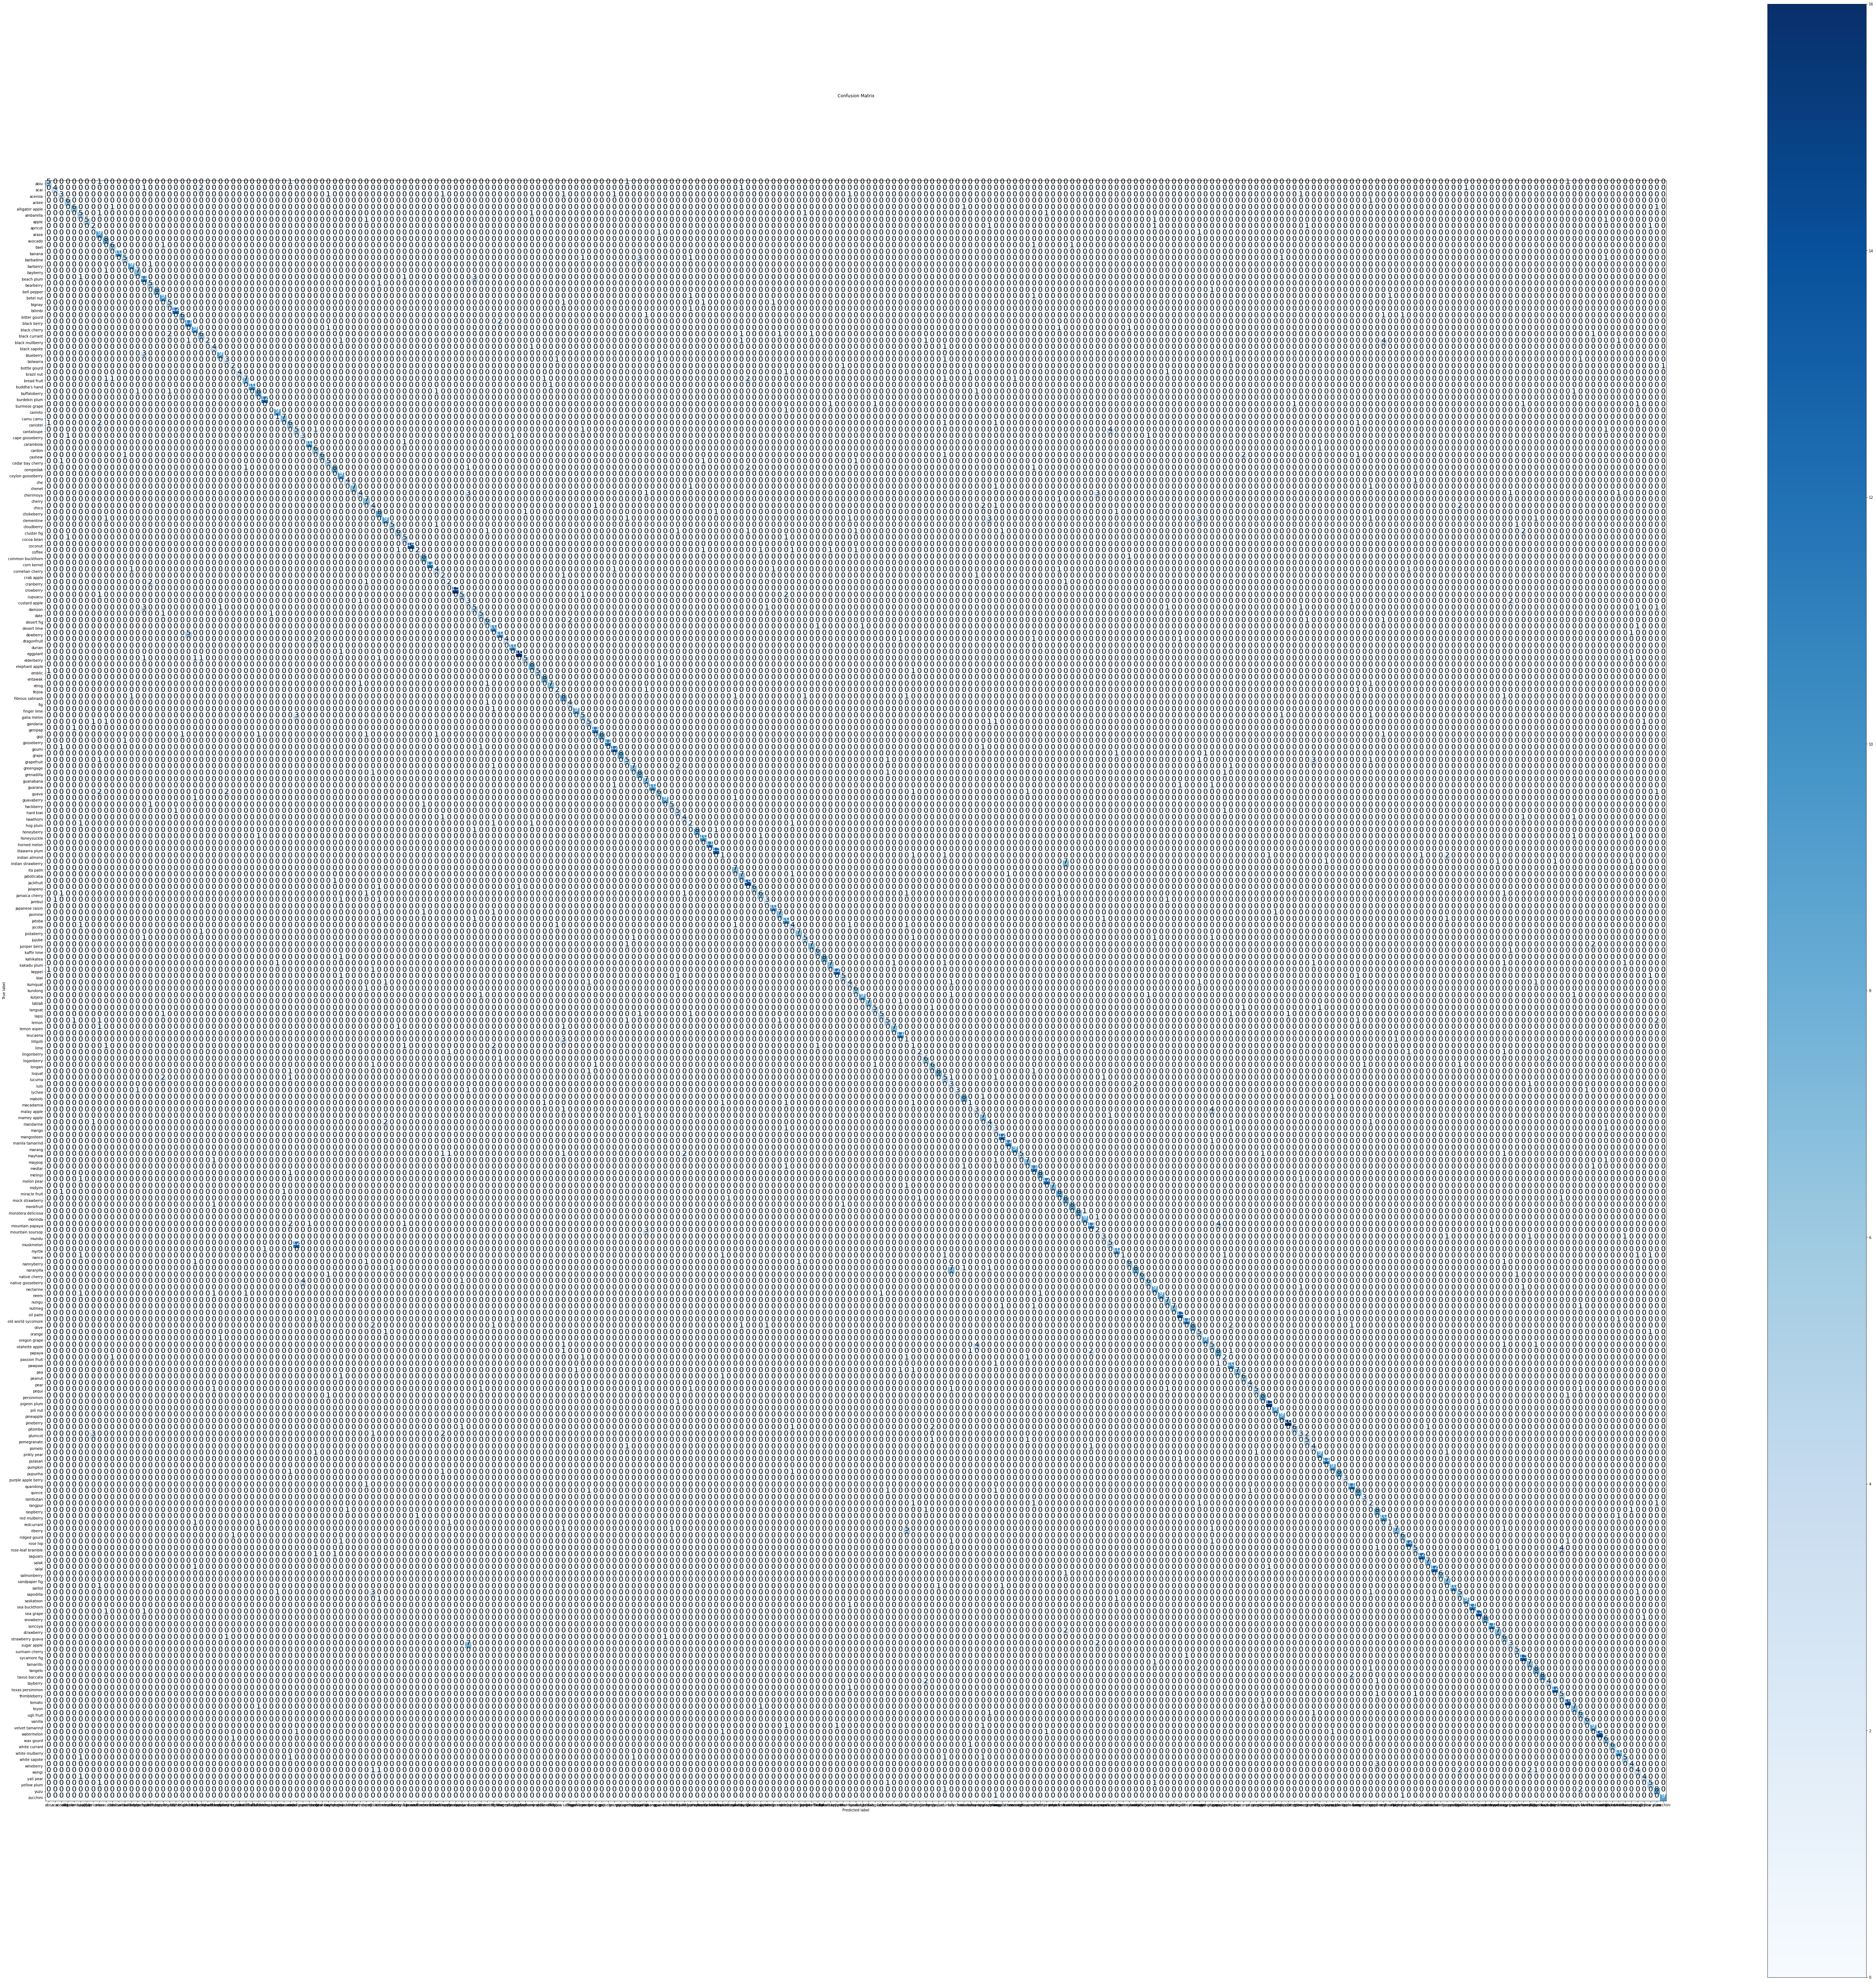

In [ ]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 255 classes
make_confusion_matrix(y_true=true,
                      y_pred=preds,
                      classes=classes,
                      figsize=(100,100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
print(classification_report(true, preds))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.80      0.44      0.57         9
           2       0.43      0.33      0.38         9
           3       0.75      0.86      0.80         7
           4       0.75      0.67      0.71         9
           5       0.38      0.56      0.45         9
           6       1.00      0.62      0.77         8
           7       0.29      0.33      0.31         6
           8       0.43      0.82      0.56        11
           9       0.57      1.00      0.73         8
          10       0.67      0.67      0.67         9
          11       1.00      1.00      1.00        10
          12       0.71      0.42      0.53        12
          13       0.82      0.90      0.86        10
          14       0.78      0.88      0.82         8
          15       0.52      0.69      0.59        16
          16       0.56      0.83      0.67         6
          17       1.00    

In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(true, preds, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.5882352941176471,
  'precision': 0.625,
  'recall': 0.5555555555555556,
  'support': 9},
 '1': {'f1-score': 0.5714285714285714,
  'precision': 0.8,
  'recall': 0.4444444444444444,
  'support': 9},
 '10': {'f1-score': 0.6666666666666666,
  'precision': 0.6666666666666666,
  'recall': 0.6666666666666666,
  'support': 9},
 '100': {'f1-score': 0.5714285714285714,
  'precision': 0.5714285714285714,
  'recall': 0.5714285714285714,
  'support': 7},
 '101': {'f1-score': 0.28571428571428575,
  'precision': 0.25,
  'recall': 0.3333333333333333,
  'support': 6},
 '102': {'f1-score': 0.888888888888889,
  'precision': 1.0,
  'recall': 0.8,
  'support': 10},
 '103': {'f1-score': 0.7407407407407408,
  'precision': 0.7692307692307693,
  'recall': 0.7142857142857143,
  'support': 14},
 '104': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 11},
 '105': {'f1-score': 0.9285714285714286,
  'precision': 0.8666666666666667,
  'recall': 1.0,
  'support': 13},
 '106': {'f1-s

In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[classes[int(k)]] = v["f1-score"]
class_f1_scores

{'abiu': 0.5882352941176471,
 'acai': 0.5714285714285714,
 'acerola': 0.375,
 'ackee': 0.7999999999999999,
 'alligator apple': 0.7058823529411765,
 'ambarella': 0.4545454545454546,
 'apple': 0.7692307692307693,
 'apricot': 0.30769230769230765,
 'araza': 0.5625,
 'avocado': 0.7272727272727273,
 'bael': 0.6666666666666666,
 'banana': 1.0,
 'barbadine': 0.5263157894736842,
 'barberry': 0.8571428571428572,
 'bayberry': 0.823529411764706,
 'beach plum': 0.5945945945945946,
 'bearberry': 0.6666666666666667,
 'bell pepper': 0.9411764705882353,
 'betel nut': 0.6923076923076924,
 'bignay': 0.625,
 'bilimbi': 0.9230769230769231,
 'bitter gourd': 0.75,
 'black berry': 0.7333333333333334,
 'black cherry': 0.6923076923076924,
 'black currant': 0.5454545454545454,
 'black mullberry': 0.3076923076923077,
 'black sapote': 0.5714285714285715,
 'blueberry': 0.7826086956521738,
 'bolwarra': 0.42857142857142855,
 'bottle gourd': 0.5,
 'brazil nut': 0.7272727272727273,
 'bread fruit': 0.6086956521739131,
 

In [ ]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

,class_name,f1-score
64,crowberry,1.000000
11,banana,1.000000
104,horned melon,1.000000
60,corn kernel,1.000000
57,coconut,1.000000
...,...,...
106,indian almond,0.166667
136,lime,0.142857
135,lillipilli,0.125000
35,burmese grape,0.000000


### F1 scores

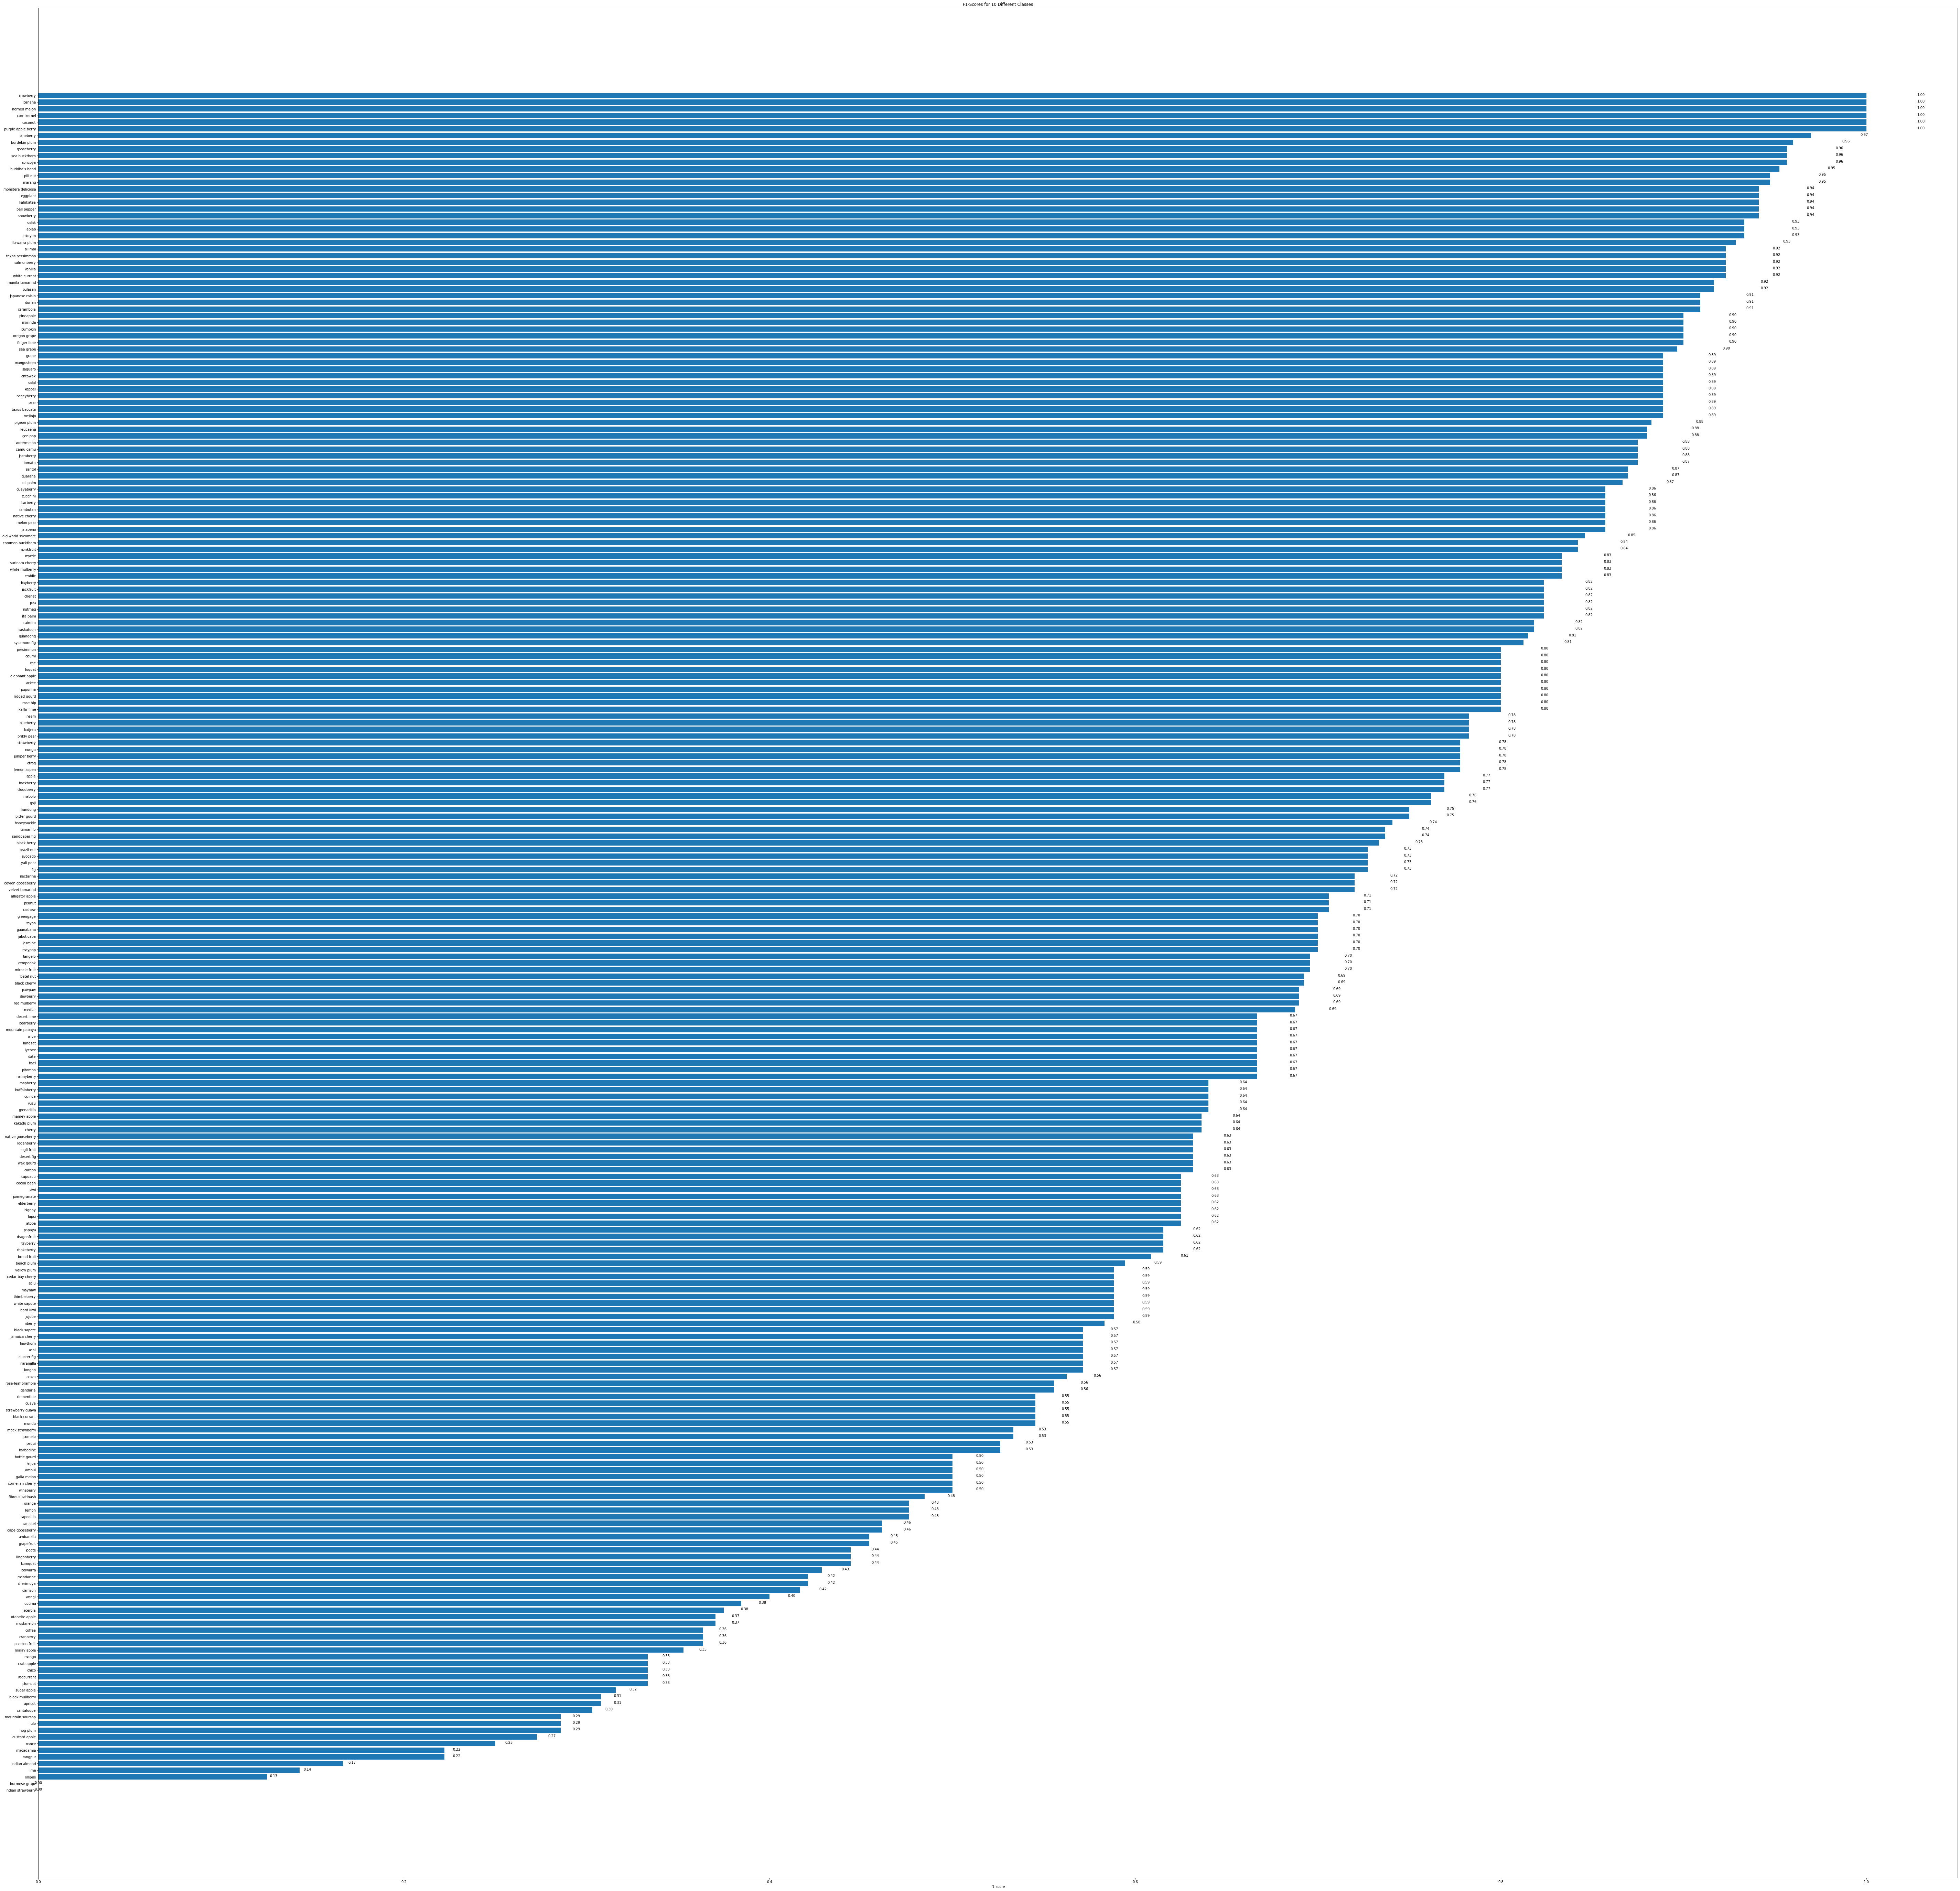

In [ ]:
fig, ax = plt.subplots(figsize=(100, 100))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

## Visualizing the wrong predictions 


In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

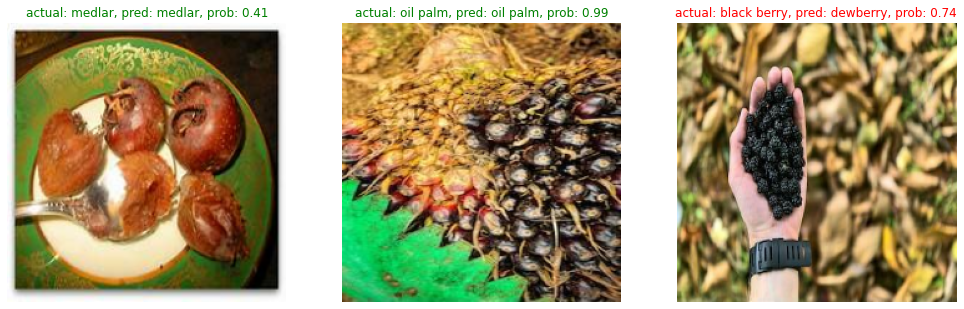

In [ ]:
# Make preds on a series of random images
plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class 
  files = pd.unique(test_df["filepaths"])
  filepath = random.choice(files)
  filepath_s = filepath
  filepath_s = filepath_s[19:]
  class_name = filepath_s.split("/")[0]

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model_load.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = classes[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [ ]:
# 1. Get the filenames of all of our test data
filepaths = []
for filepath in test_df["filepaths"]:
  filepaths.append(filepath)
filepaths[:10]

['/content/Fruit-262/salal/332.jpg',
 '/content/Fruit-262/black mullberry/845.jpg',
 '/content/Fruit-262/mountain papaya/542.jpg',
 '/content/Fruit-262/ugli fruit/732.jpg',
 '/content/Fruit-262/salal/90.jpg',
 '/content/Fruit-262/guanabana/989.jpg',
 '/content/Fruit-262/abiu/1149.jpg',
 '/content/Fruit-262/pupunha/880.jpg',
 '/content/Fruit-262/oregon grape/64.jpg',
 '/content/Fruit-262/jamaica cherry/18.jpg']

In [ ]:
# 2. Create a dataframe out of current prediction data for analysis
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": true,
                        "y_pred": preds,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [classes[i] for i in true],
                        "y_pred_classname": [classes[i] for i in tf.squeeze(preds).numpy()]}) 
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,/content/Fruit-262/salal/332.jpg,218,218,0.999999,salal,salal
1,/content/Fruit-262/black mullberry/845.jpg,25,210,0.496596,black mullberry,red mulberry
2,/content/Fruit-262/mountain papaya/542.jpg,164,164,0.993078,mountain papaya,mountain papaya
3,/content/Fruit-262/ugli fruit/732.jpg,241,148,0.445772,ugli fruit,mandarine
4,/content/Fruit-262/salal/90.jpg,218,218,0.997375,salal,salal


In [ ]:
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,/content/Fruit-262/salal/332.jpg,218,218,0.999999,salal,salal,True
1,/content/Fruit-262/black mullberry/845.jpg,25,210,0.496596,black mullberry,red mulberry,False
2,/content/Fruit-262/mountain papaya/542.jpg,164,164,0.993078,mountain papaya,mountain papaya,True
3,/content/Fruit-262/ugli fruit/732.jpg,241,148,0.445772,ugli fruit,mandarine,False
4,/content/Fruit-262/salal/90.jpg,218,218,0.997375,salal,salal,True


In [ ]:
# 4. Get the top 100 wrong examples
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
497,/content/Fruit-262/mabolo/514.jpg,144,202,0.999999,mabolo,pumpkin,False
134,/content/Fruit-262/passion fruit/978.jpg,185,154,0.999998,passion fruit,maypop,False
1327,/content/Fruit-262/barbadine/506.jpg,12,93,0.999994,barbadine,grenadilla,False
750,/content/Fruit-262/lime/524.jpg,136,121,0.999991,lime,kaffir lime,False
1657,/content/Fruit-262/pequi/127.jpg,190,176,0.999977,pequi,nungu,False
1062,/content/Fruit-262/damson/781.jpg,67,15,0.999966,damson,beach plum,False
2340,/content/Fruit-262/pitomba/93.jpg,196,139,0.999961,pitomba,longan,False
2532,/content/Fruit-262/lablab/785.jpg,129,134,0.999918,lablab,leucaena,False
1712,/content/Fruit-262/rose-leaf bramble/195.jpg,215,238,0.999911,rose-leaf bramble,thimbleberry,False
197,/content/Fruit-262/olive/297.jpg,180,205,0.999762,olive,quandong,False


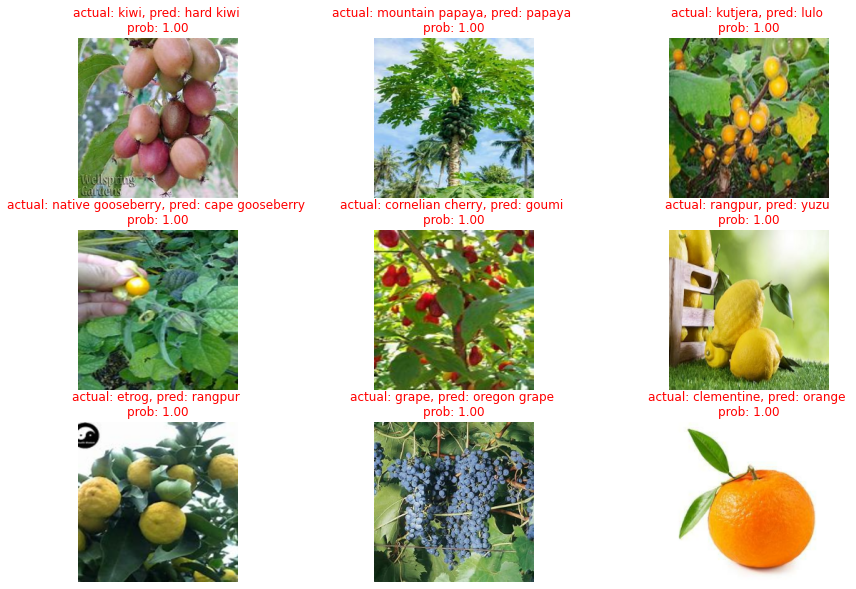

In [ ]:
# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 30 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()): 
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}", color="red")
  plt.axis(False)